互联网中充斥着大量钓鱼欺诈类网站。这类非法网站通常试图掩人耳目、充当正规网站，而实际上却是在窃取用户的身份、密码、交易等重要信息
机器学习在信息安全领域中的一个重要应用就是用来识别这些钓鱼网站。fraudulent.csv在data文件夹中。

fraudulent.csv文件中含有10,086条数据，每条数据含有18个特征以及1个标签。各个特征的含义如下：

    contain_IP：网址中是否包涵ip，比如http://121.99.3.123/fake.html 包含ip。1表示包含，0表示不包含；
    is_long：网址字符是否过长。1表示网址过长，0表示网址不长；
    is_tinyurl：网址是否是短网址。比如https://bit.ly/2kXX6jV 就是短网址。1表示是短网址，0表示不是；
    contain_at：网址是否包含“@”符号。1表示包含，0表示不包含；
    contain_double_slash：网址是否包含“//”符号，该符号用来表示网址跳转。1表示包含，0表示不包含；
    contain_dash：网址是否包含“-”符号，该符号经常帮助用来伪装真网站，比如www.my-taobao.com 。 1表示包含，0表示不包含；
    contain_subdomain：网址是否包含子域名，比如www.ecnu.edu.cn 就包含edu和cn子域名。1表示包含，0表示不包含；
    is_SSL：网址是否是https安全链接。1表示包含，0表示不包含；
    with_long_history：网址所属的主域名存在的时间。1表示长久，0表示不长久；
    contain_icon：网址网页是否有小图标。1表示包含，0表示不包含；
    contain_ext_domain：该网页是否加载其他域名下的附件或者网页。1表示包含，0表示不包含；
    contain_email_to：该网页是否包含发送邮件的组件。1表示包含，0表示不包含；
    allow_right_click：该网页是否允许用户进行右击操作。1表示允许，0表示不允许；
    contain_pop_up_windowL：该网页是否包含弹窗。1表示包含，0表示不包含；
    contain_Iframe：该网页是否包含Iframe（嵌套网页）。1表示包含，0表示不包含；
    has_DNSRecord：网址是否有DNS记录。1表示有，0表示无；
    traffic：该网站的流量大小。1表示大，0表示小；
    google_rank：该网址在google搜索中的排名。1表示高于同类网站的平均排名，0表示低于同类网站的平均排名；
    
    y：表示网站是否是钓鱼欺诈网站，1表示是，0表示不是。
    原始数据中含有大量缺失值，请自行处理这些缺失值（可以剔除缺失值过多的列或者使用众数填充等方法）。

将原始数据分为训练集、测试集（随机种子请设置为1）（若有需要可以将训练集进一步分为训练集和验证集）。

现在请建立一个二分类模型，使用训练集训练模型，再使用测试集测试模型。

评估指标为F1值

分类模型可采用：k-近邻、决策树、逻辑回归、支持向量机等。

可以与周围同学比较一下F1值的大小（越接近1越好），看看谁的数据预处理和分类模型更强。

- 将原始数据分为训练集、测试集

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, ConfusionMatrixDisplay

data = pd.read_csv('fraudulent.csv')

imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
X = data_imputed.drop('y', axis=1)
y = data_imputed['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

- K-近邻

K-近邻 F1 Score: 0.839968774395004


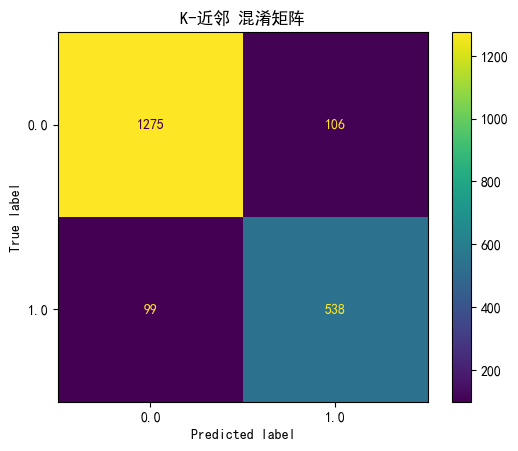

In [3]:
from sklearn.neighbors import KNeighborsClassifier

plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用SimHei字体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)
f1_knn = f1_score(y_test, y_pred_knn)
print(f'K-近邻 F1 Score: {f1_knn}')

# 显示混淆矩阵
ConfusionMatrixDisplay.from_estimator(knn_model, X_test, y_test)
plt.title('K-近邻 混淆矩阵')
plt.show()

- 决策树模型

决策树 F1 Score: 0.8653386454183267


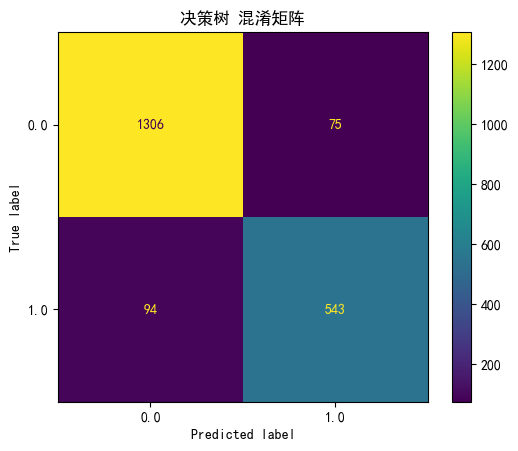

In [4]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
f1_dt = f1_score(y_test, y_pred_dt)
print(f'决策树 F1 Score: {f1_dt}')

# 显示混淆矩阵
ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test)
plt.title('决策树 混淆矩阵')
plt.show()

- 逻辑回归模型

逻辑回归 F1 Score: 0.8490718321226796


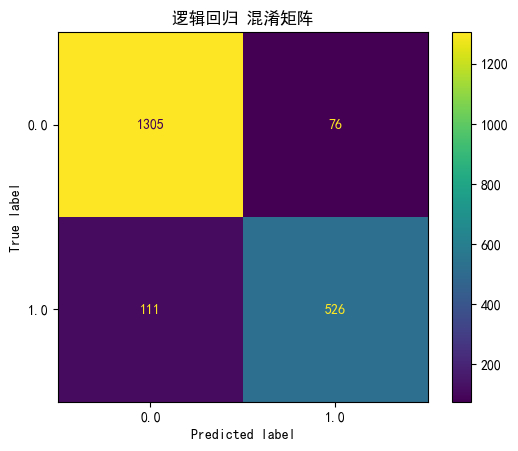

In [5]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
f1_lr = f1_score(y_test, y_pred_lr)
print(f'逻辑回归 F1 Score: {f1_lr}')

# 显示混淆矩阵
ConfusionMatrixDisplay.from_estimator(lr_model, X_test, y_test)
plt.title('逻辑回归 混淆矩阵')
plt.show()

- 支持向量机模型

支持向量机 F1 Score: 0.8585131894484412


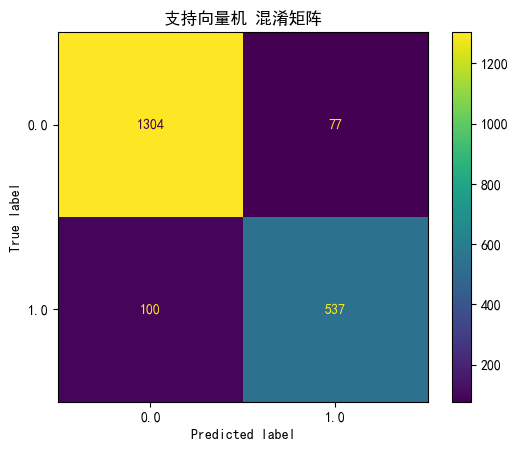

In [6]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
f1_svm = f1_score(y_test, y_pred_svm)
print(f'支持向量机 F1 Score: {f1_svm}')

# 显示混淆矩阵
ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test)
plt.title('支持向量机 混淆矩阵')
plt.show()

- 几种模型的比较

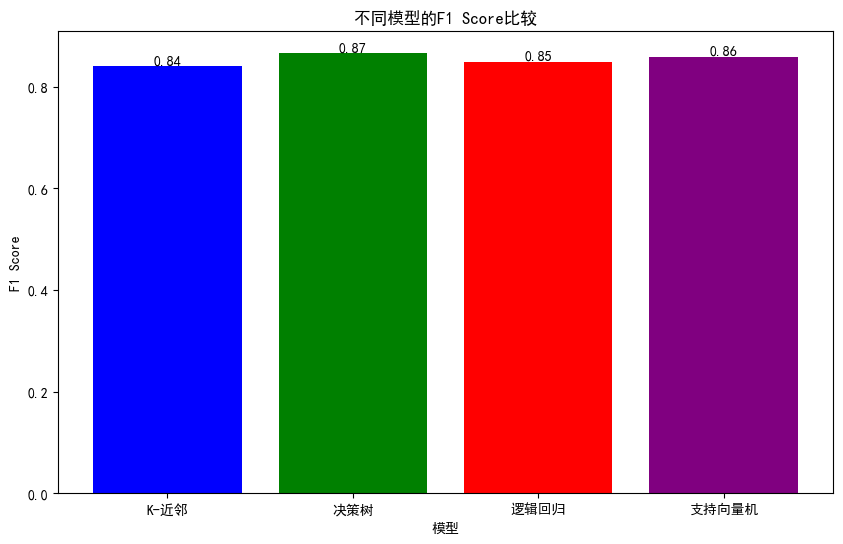

In [8]:
f1_scores = {
    'K-近邻': f1_knn,
    '决策树': f1_dt,
    '逻辑回归': f1_lr,
    '支持向量机': f1_svm
}

plt.figure(figsize=(10, 6))
bars = plt.bar(f1_scores.keys(), f1_scores.values(), color=['blue', 'green', 'red', 'purple'])

# 在每个条形图上显示数值
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.xlabel('模型')
plt.ylabel('F1 Score')
plt.title('不同模型的F1 Score比较')
plt.show()